# **6610210301 ภานุพงศ์ สนไชย**

# **Assignment 04:** Visualize Second-moment Matrix

In this assignment, you are supposed to write Python script to visualize the eigenvalues and eigenvectors of the second-moment matrix, as you see in Slide #55 in Chapter 05.

### Second-Moment Matrix:

The second-moment matrix is computed from the gradients of the image. For a given pixel, the matrix is defined as:

$$
\ M = \begin{bmatrix}
          I_x^2 & I_x I_y \\
          I_x I_y & I_y^2
      \end{bmatrix}
$$

Where:
- $I_x$ is the gradient of the image in the x-direction.
- $I_y$ is the gradient of the image in the y-direction.

### Steps:

1. Caculate the **gradients**
2. Construct the **second-moment matrix**
3. Calculate **eigenvalues** and **eigenvectors**
4. Visualize **eigenvalues** and **eigenvectors**

## **Step 0:** Setup and Utility Functions

First, make sure you have installed the required libraries and check what is your *present working directory*:

In [1]:
!pip install numpy pillow
!echo "Your current directory is: $(pwd)"

Your current directory is: /content


You are provided with some utility functions for reading, writing, and rendering images.

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, gaussian_filter
import colorsys

%matplotlib inline


"""
Utility functions to read, to display, and to save an image
"""
def read_img(path, greyscale=True):
    img = Image.open(path)
    if greyscale:
        img = img.convert('L')
    else:
        img = img.convert('RGB')
    return np.array(img).astype(float)


def show_img(img_array, cmap=None, title=""):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title(title)
    if cmap is None:
        img_array = img_array - img_array.min()
        img_array = img_array / img_array.max()
        img_array = (img_array * 255).astype(np.uint8)
        plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    else:
        plt.imshow(img_array, cmap=cmap, vmin=0, vmax=255)
    plt.show()

Load and show the input image.

***Note*** : You must use `grace_hopper.png` for this assignment.

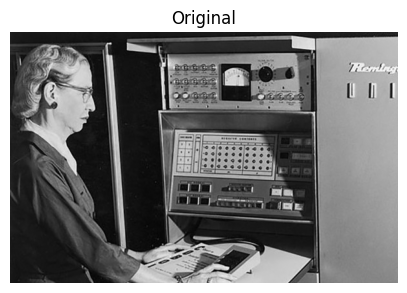

In [4]:
image = read_img("grace_hopper.png")
show_img(image, title="Original")

## **Step 1:** Compute Image Gradients
Compute the image gradients $I_x$ and $I_y$ using convolution with the Sobel operator or Gaussian derivative filter.

***Note*** : You may use either the Sobel operator or Gaussian derivative filter to find the gradients.

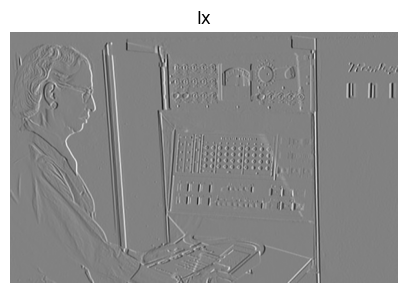

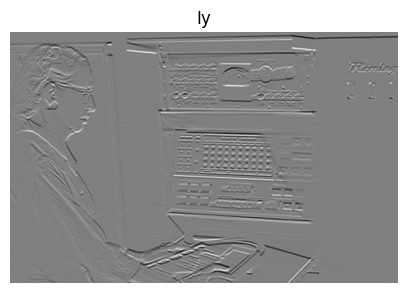

In [6]:
from scipy.ndimage import convolve

# Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Compute gradients
Ix = convolve(image, sobel_x)
Iy = convolve(image, sobel_y)

show_img(Ix, title="Ix")
show_img(Iy, title="Iy")

## **Step 2:** Construct the second-moment matrix
Using the gradients calculated in previous section, construct the second-moment matrix $M$ for each pixel:

$$
M=\begin{bmatrix}
\sum_{x,y \in W}I_x^2  & \sum_{x,y \in W}I_xI_y \\
\sum_{x,y \in W}I_xI_y & \sum_{x,y \in W}I_y^2
\end{bmatrix}
=\begin{bmatrix}
M_{xx} & M_{xy} \\
M_{xy} & M_{yy}
\end{bmatrix}
$$

Where:
- $I_x$ is the gradient of the image in the x-direction.
- $I_y$ is the gradient of the image in the y-direction.
- $M_{xx}$ is the summation of $I_x^2$ over $x, y$ in a window $W$
- $M_{xy}$ is the summation of $I_xI_y$ over $x, y$ in a window $W$
- $M_{yy}$ is the summation of $I_y^2$ over $x, y$ in a window $W$

***Note*** : In this section, you may add extra lines of code as needed.

In [ ]:
# Compute the products of gradients
Ix2 = Ix * Ix
Iy2 = Iy * Iy
Ixy = Ix * Iy

# Apply a Gaussian filter to sum the values in a local window
Mxx = gaussian_filter(Ix2, sigma=1)
Myy = gaussian_filter(Iy2, sigma=1)
Mxy = gaussian_filter(Ixy, sigma=1)

## **Step 3:** Eigenvalue/eigenvector Calculation

### Eigenvalue Calculation:

The eigenvalues $\lambda_1$ and $\lambda_2$ of the matrix $M$ can be found by solving the characteristic equation:

$$
det(M-{\lambda}I)=0
$$

This expands to:

$$
{\lambda}^2-(I_x^2 + I_y^2){\lambda}+(I_x^2I_y^2-(I_xIy)^2)=0
$$

The solutions to this quadratic equation give the eigenvalues:

$$
\lambda_{1,2}=
\frac{(I_x^2​+I_y^2​)\pm\sqrt{(I_x^2+I_y^2)^2-4(I_x^2I_y^2-(I_xI_y)^2)}}{2}
$$

### Eigenvector Calculation:

Once the eigenvalues are computed, the corresponding eigenvectors can be found by substituting each eigenvalue back into the equation:

$$
(M-{\lambda}I)v=0
$$

This leads to a system of linear equations that can be solved to find the eigenvectors $v$.

$ $

### Implementation:

In practice, you do not have to get a headache writing lines of code to solve the equations above. Just take a look at [`numpy.linalg.eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).


***Note*** : In this section, you may add extra lines of code as needed.

In [ ]:
H = image.shape[0]
W = image.shape[1]

eigenvalues = np.zeros((H, W, 2))
eigenvectors = np.zeros((H, W, 2, 2))

# Compute eigenvalues and eigenvectors for each pixel
for y in range(H):
    for x in range(W):
        M = np.array([[Mxx[y, x], Mxy[y, x]],
                      [Mxy[y, x], Myy[y, x]]])

        # คำนวณ eigenvalues (w) และ eigenvectors (v) จากเมทริกซ์ M
        w, v = np.linalg.eig(M)

        # เก็บผลลัพธ์
        eigenvalues[y, x] = w  # w คือ eigenvalues 2 ค่า (λ1, λ2)
        eigenvectors[y, x] = v # v คือ eigenvectors 2 อัน

# Normalize eigenvalues to the range [0, 1]
max_eigenvalue = np.max(eigenvalues)
normalized_eigenvalues = eigenvalues / max_eigenvalue

# สรุป: มันไม่ใช่การบวกกัน
# Eigenvector ไม่ใช่ผลลัพธ์ของการนำ Gradient Vector ทั้งหมดมาบวกกัน (Vector Sum) เพราะถ้าทำแบบนั้น ที่บริเวณมุมซึ่ง Gradient ชี้ไปคนละทิศทาง มันอาจจะหักล้างกันจนเหลือเวกเตอร์เล็กๆ หรือกลายเป็นศูนย์ไปเลยก็ได้
# ก็คือทิศทางของ gradient กลุ่มนั้น 
# แต่มันคือ การวิเคราะห์การกระจายตัว (Distribution) หรือความแปรปรวน (Variance) ของกลุ่ม Gradient Vector เหล่านั้น เพื่อหาว่า "แกนหลัก" ของการเปลี่ยนแปลงในพื้นที่นั้นๆ ชี้ไปในทิศทางไหน และมีพลังมากแค่ไหนครับ

## **Step 4:** Eigenvalue/eigenvector Visualization

Use Matplotlib to create ellipses based on the eigenvalues and eigenvectors. The image below visulaizes the eigenvalues/eigenvectors of every pixels inside  the red region (from (250, 150) to (280, 180)):

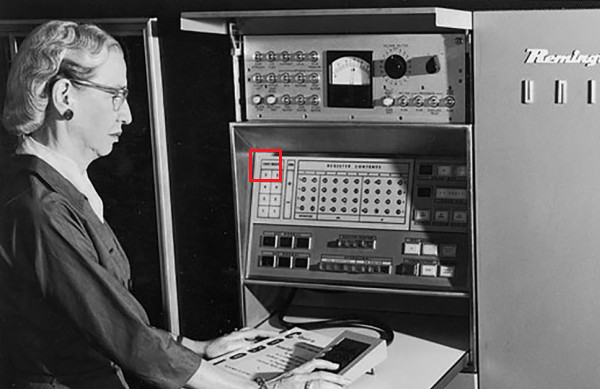

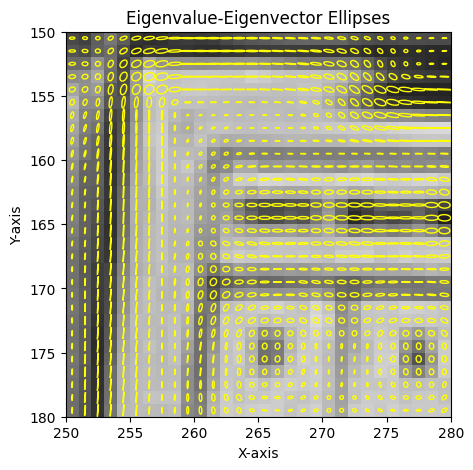

***Note*** : You do not need to implement anything in this section. Just define the window you would like to see the output: `x_min`, `x_max`, `y_min`, and `y_max`. Then, run the cell below to see the output 😀

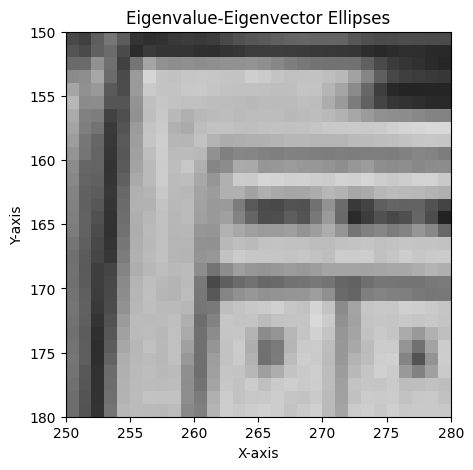

In [9]:
# Normalize pixel intensity to the range [0, 1]
norm_img = image - np.min(image)
norm_img = norm_img / np.max(norm_img)

# Visualize Region
x_min = 250
x_max = 280
y_min = 150
y_max = 180

# Visualization
plt.figure(figsize=(5, 5))

# Loop through each matrix to plot ellipses
for y in range(y_min, y_max):
    for x in range(x_min, x_max):
        # Get the normalized eigenvalues and eigenvectors
        vals = normalized_eigenvalues[y, x]
        vecs = eigenvectors[y, x]

        # Calculate the angle of the ellipse
        angle = np.arctan2(vecs[1, 0], vecs[0, 0]) * (180 / np.pi)

        # Paint the pixel
        pixel = plt.matplotlib.patches.Rectangle(
            xy=(x,y),
            width=1,
            height=1,
            angle=0.0,
            edgecolor='none',
            facecolor=str(norm_img[y,x])
        )
        plt.gca().add_patch(pixel)

        # Paint the ellipse
        ellipse = plt.matplotlib.patches.Ellipse(
            xy=(x+0.5, y+0.5),
            width=2 * np.sqrt(vals[1]),
            height=2 * np.sqrt(vals[0]),
            angle=angle,
            edgecolor='yellow',
            facecolor='none'
        )
        plt.gca().add_patch(ellipse)

# Set limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Eigenvalue-Eigenvector Ellipses')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()